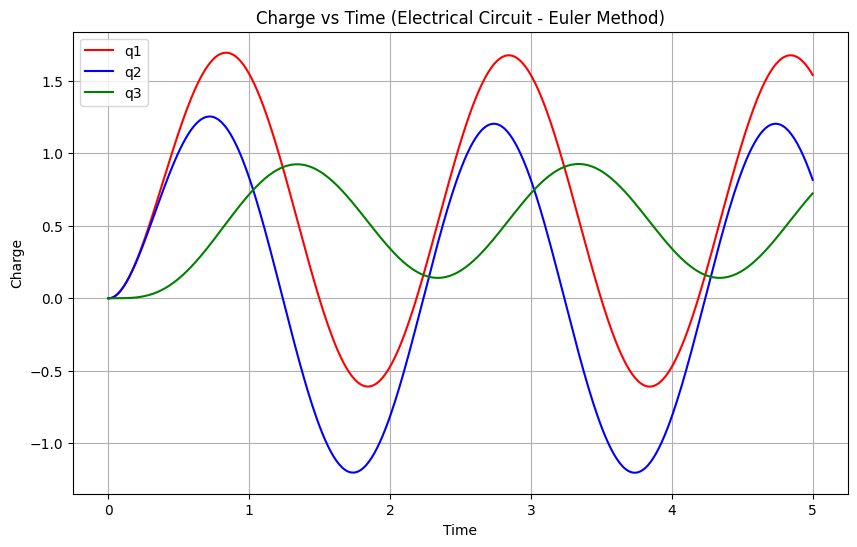

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Constants
R1 = 1  # 10e+3  # ohms
R2 = 2  # 20e+3  # ohms
C = 0.47  # 0.47e-6  # Farads
L = 0.2  # 10.0e-6  # Henries
V = 5  # Volts

# Time parameters
t_max = 5  # seconds
dt = 0.01  # seconds

frequency = 1  # Hz

# Initial conditions
q1 = 0  # Coulombs
q2 = 0  # Coulombs
q3 = 0  # Coulombs
q4 = 0  # Coulombs

# Lists to store data for plotting
time_vals = []
q1_vals = []
q2_vals = []
q3_vals = []
I1_vals = []
I2_vals = []
I3_vals = []

# Runge-Kutta method integration
t = 0
while t < t_max:
    # Store data for plotting
    time_vals.append(t)
    q1_vals.append(q1)
    q2_vals.append(q2)
    q3_vals.append(q3)
    if t != 0:  # avoid division by zero at the start
        I1 = (q1_vals[-1] - q1_vals[-2]) / dt
        I2 = (q2_vals[-1] - q2_vals[-2]) / dt
        I3 = (q3_vals[-1] - q3_vals[-2]) / dt
        I1_vals.append(I1)
        I2_vals.append(I2)
        I3_vals.append(I3)

    # Sinusoidal voltage source
    V = 5 * np.sin(np.pi * frequency * t)

    # Runge-Kutta method update for the electrical circuit
    k1_q1 = dt * (V / R1 - q2 / (R1 * C))
    k1_q2 = dt * (V / R1 - q2 / (R1 * C) - q4)
    k1_q3 = dt * q4
    k1_q4 = dt * (q2 / (L * C) - R2 / L * q4)

    k2_q1 = dt * ((V / R1 - q2 / (R1 * C)) + 0.5 * k1_q1)
    k2_q2 = dt * ((V / R1 - q2 / (R1 * C) - q4) + 0.5 * k1_q2)
    k2_q3 = dt * (q4 + 0.5 * k1_q3)
    k2_q4 = dt * ((q2 / (L * C) - R2 / L * q4) + 0.5 * k1_q4)

    k3_q1 = dt * ((V / R1 - q2 / (R1 * C)) + 0.5 * k2_q1)
    k3_q2 = dt * ((V / R1 - q2 / (R1 * C) - q4) + 0.5 * k2_q2)
    k3_q3 = dt * (q4 + 0.5 * k2_q3)
    k3_q4 = dt * ((q2 / (L * C) - R2 / L * q4) + 0.5 * k2_q4)

    k4_q1 = dt * (V / R1 - q2 / (R1 * C) + k3_q1)
    k4_q2 = dt * (V / R1 - q2 / (R1 * C) - q4 + k3_q2)
    k4_q3 = dt * (q4 + k3_q3)
    k4_q4 = dt * (q2 / (L * C) - R2 / L * q4 + k3_q4)

    q1 = q1 + (k1_q1 + 2 * k2_q1 + 2 * k3_q1 + k4_q1) / 6
    q2 = q2 + (k1_q2 + 2 * k2_q2 + 2 * k3_q2 + k4_q2) / 6
    q3 = q3 + (k1_q3 + 2 * k2_q3 + 2 * k3_q3 + k4_q3) / 6
    q4 = q4 + (k1_q4 + 2 * k2_q4 + 2 * k3_q4 + k4_q4) / 6

    if (q1 - (q2 + q3)) > 0.0001:
        print(q1, q2 + q3)
        print(q1 - (q2 + q3))
        break

    # Time update
    t = t + dt


# Plotting using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(time_vals, q1_vals, label="q1", color="red")
plt.plot(time_vals, q2_vals, label="q2", color="blue")
plt.plot(time_vals, q3_vals, label="q3", color="green")
plt.title("Charge vs Time (Electrical Circuit - Euler Method)")
plt.xlabel("Time")
plt.ylabel("Charge")
plt.legend()
plt.grid(True)
plt.show()